## PREDICCIÓN DE PRECIOS DE CASAS CON REGRESIÓN LINEAL SIMPLE

Mediante este notebook vamos a crear un modelo de Regresión Lineal Simple para predecir precios de viviendas. Después de describir los datos y limpiarlos, vamos a realizar un Análisis Exploratorio de los mismos para comprender mejor el dataset pra, por último, crear el modelo predictivo.

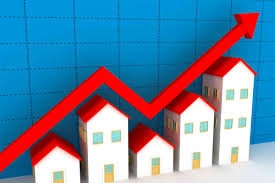

### Descripción de los datos

En este dataset hay un total de 21 columnas, las cuáles se describen a continuación:

  - ID: Correlativo númerico que distingue cada una de las casas vendidas.
  - Date: Fecha en la cual fue vendida la casa.
  - Price: Precio de venta de la casa (en dólares norteamericanos).
  - Bedrooms: Número de cuartos en la casa.
  - Bathrooms: Número de baños disponibles en la casa, donde un valor de 0.5 representa un baño con inodoro pero si
  - Sqft_living15: Los pies cuadrados de espacio habitable de la casa interior para los 15 vecinos más cercanos.
  - Sqft_lot15: Los metros cuadrados de los terrenos de los 15 vecinos más cercanos.n ducha.
  - Sqft_living: Número de pies cuadrados del espacio habitable de la casa.
  - Sqft_lot: Pies cuadrados del espacio total del terreno donde se ubica la casa.
  - Floors: Cantidad de pisos en la casa.
  - Waterfront: Variable que indica la presencia o no de vista al mar en la casa.
  - View: Índice del 0 al 4 que indica que tan buena es la vista de la propiedad.
  - Condition: Índice del 1 al 5 para calificar la condición actual de la casa.
  - Grade: Índice del 1 al 13, el cuál califica el nivel de calidad de construcción de la casa.
  - Sqft_above: Cantidad de pies cuadrados del espacio interior de la casa. que está sobre el nivel del suelo.
  - Sqft_basement: Los pies cuadrados del espacio interior de la casa. que está por debajo del nivel del suelo.
  - Yr_built: El año en fue construida la casa.
  - Yr_renovated: Año de la última renovación de la casa.
  - Zipcode: Código postal del areá donde se encuentra la casa.
  - Lat: Latitud de la ubicación de la casa.
  - Long: Longitud de la15 vecinos más cercanos.

### Importar librerías

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

### Cargar los datos

In [8]:
# Cargar datos
data = pd.read_csv("House Price.csv", delimiter=";")

In [9]:
# Ver primeros resultados
data.head(3)

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,bsmt,sqft_bsmt,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long
0,7129300520,20141013T000000,2014,221900.0,3,1.00,1180,5650,1340,5650,...,0,0,1955,59,0,0,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,2014,538000.0,3,2.25,2570,7242,1690,7639,...,1,400,1951,63,1991,1,23,98125,47.7210,-122.319
2,5631500400,20150225T000000,2015,180000.0,2,1.00,770,10000,2720,8062,...,0,0,1933,82,0,0,0,98028,47.7379,-122.233


In [10]:
# Ver tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   year           21613 non-null  int64  
 3   price          21613 non-null  float64
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   sqft_living15  21613 non-null  int64  
 9   sqft_lot15     21613 non-null  int64  
 10  floors         21613 non-null  float64
 11  waterfront     21613 non-null  int64  
 12  view           21613 non-null  int64  
 13  condition      21613 non-null  int64  
 14  grade          21613 non-null  int64  
 15  sqft_above     21613 non-null  int64  
 16  bsmt           21613 non-null  int64  
 17  sqft_bsmt      21613 non-null  int64  
 18  yr_bui

### Limpieza de los datos

Vamos a comprobar si alguna de las variables tiene nulos y a cambiar la variable "date" a formato fecha.

In [13]:
# Comprobar nulos
data.isna().sum()

id               0
date             0
year             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
sqft_living15    0
sqft_lot15       0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
bsmt             0
sqft_bsmt        0
yr_built         0
age              0
yr_renovated     0
renov            0
age_renov        0
zipcode          0
lat              0
long             0
dtype: int64

In [14]:
# Convertir fecha a formato fecha
data["date"] = pd.to_datetime(data["date"])

### Análisis Exploratorio de los Datos

#### Matriz de correlación

Vamos a comprobar la relación entre las variables mediante una matriz de correlación, la cual nos indica a través de un valor cuanto influye una variable en otra.

In [18]:
# Crear matriz de correlación
matriz_correlacion = data.corr().round(2)
matriz_correlacion

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,bsmt,sqft_bsmt,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long
id,1.00,0.01,0.01,-0.02,0.00,0.01,-0.01,-0.13,-0.00,-0.14,...,0.00,-0.01,0.02,-0.02,-0.02,-0.02,-0.02,-0.01,-0.00,0.02
date,0.01,1.00,0.85,-0.00,-0.02,-0.03,-0.03,0.01,-0.03,0.00,...,-0.01,-0.02,-0.00,0.01,-0.02,-0.02,-0.01,0.00,-0.03,-0.01
year,0.01,0.85,1.00,0.00,-0.01,-0.03,-0.03,0.01,-0.02,-0.00,...,-0.01,-0.02,0.00,0.01,-0.02,-0.02,-0.01,0.00,-0.03,0.00
price,-0.02,-0.00,0.00,1.00,0.31,0.53,0.70,0.09,0.59,0.08,...,0.18,0.32,0.05,-0.05,0.13,0.13,0.07,-0.05,0.31,0.02
bedrooms,0.00,-0.02,-0.01,0.31,1.00,0.52,0.58,0.03,0.39,0.03,...,0.16,0.30,0.15,-0.15,0.02,0.02,-0.01,-0.15,-0.01,0.13
bathrooms,0.01,-0.03,-0.03,0.53,0.52,1.00,0.75,0.09,0.57,0.09,...,0.16,0.28,0.51,-0.51,0.05,0.05,-0.00,-0.20,0.02,0.22
sqft_living,-0.01,-0.03,-0.03,0.70,0.58,0.75,1.00,0.17,0.76,0.18,...,0.20,0.44,0.32,-0.32,0.06,0.06,0.02,-0.20,0.05,0.24
sqft_lot,-0.13,0.01,0.01,0.09,0.03,0.09,0.17,1.00,0.14,0.72,...,-0.04,0.02,0.05,-0.05,0.01,0.01,0.01,-0.13,-0.09,0.23
sqft_living15,-0.00,-0.03,-0.02,0.59,0.39,0.57,0.76,0.14,1.00,0.18,...,0.04,0.20,0.33,-0.33,-0.00,-0.00,-0.01,-0.28,0.05,0.33
sqft_lot15,-0.14,0.00,-0.00,0.08,0.03,0.09,0.18,0.72,0.18,1.00,...,-0.04,0.02,0.07,-0.07,0.01,0.01,0.01,-0.15,-0.09,0.25


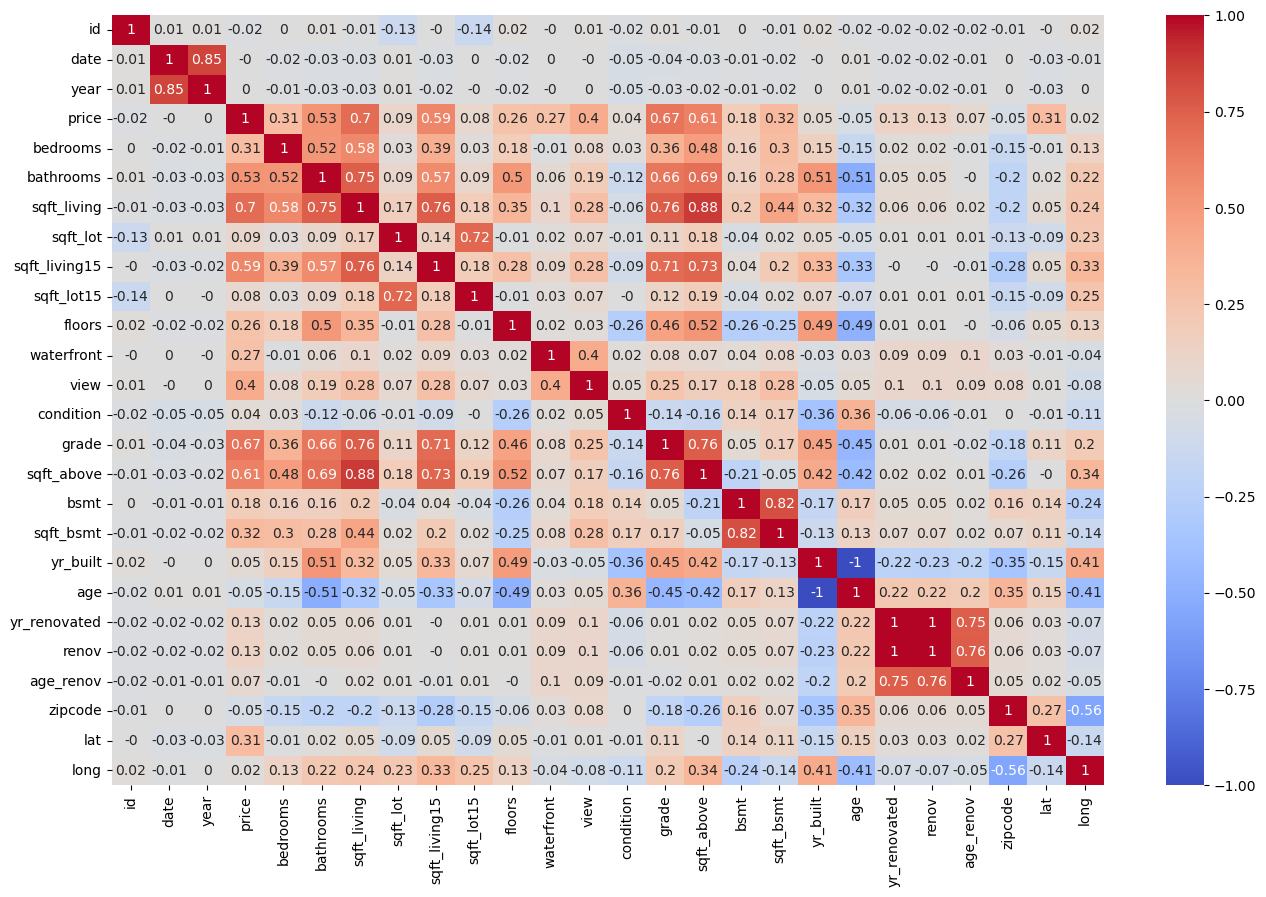

In [19]:
# Graficar matriz de correlación
plt.figure(figsize=(16,10))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm")
plt.show()

Vamos a filtrar la matriz y quedarnos con las variables que tengan mayor correlación, en este caso, superior a 0.59 e inferior a -0.59 para quedarnos con las 3 variables que más influyen en el precio:

In [21]:
filtro = (matriz_correlacion["price"] > 0.59) | (matriz_correlacion["price"] < -0.59)
matriz_correlacion.loc[filtro, filtro]

,price,sqft_living,grade,sqft_above
price,1.00,0.70,0.67,0.61
sqft_living,0.70,1.00,0.76,0.88
grade,0.67,0.76,1.00,0.76
sqft_above,0.61,0.88,0.76,1.00


#### Graficar variables

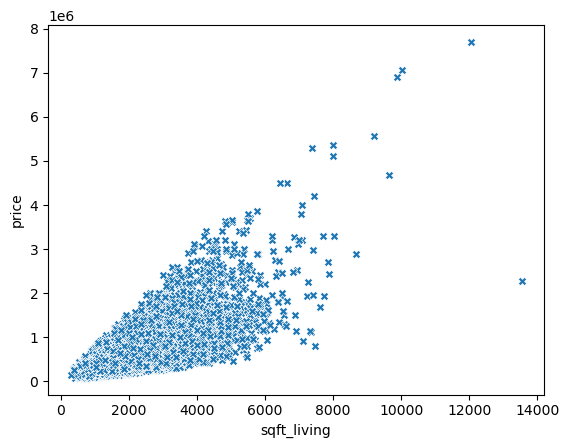

In [23]:
# sqft_living
sns.scatterplot(data = data, x = "sqft_living", y = "price", marker = "X")
plt.show()

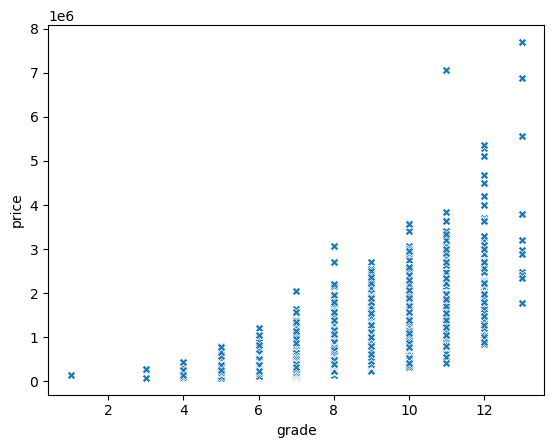

In [24]:
# grade
sns.scatterplot(data = data, x = "grade", y = "price", marker = "X")
plt.show()

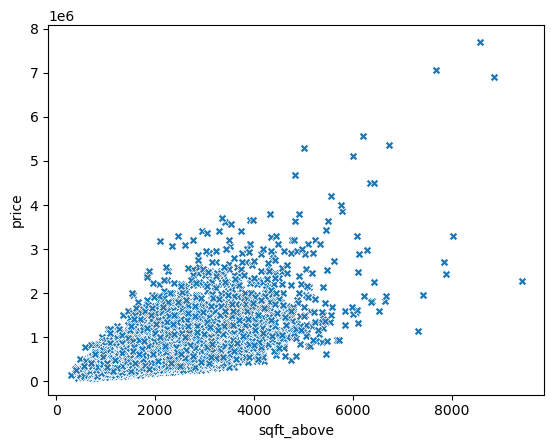

In [25]:
# sqft_above
sns.scatterplot(data = data, x = "sqft_above", y = "price", marker = "X")
plt.show()

### Análisis Predictivo

Con todo preparado, sólo queda crear el modelo para realizar la predicción:

In [28]:
# Crear modelo
modelo = smf.ols(data = data, formula = "price ~ sqft_living").fit()
modelo

In [29]:
# Comprobar R^2
modelo.rsquared

0.49286538652201417

In [30]:
# Agregar predicciones a data
data["prediccion_precio"] = modelo.predict(data["sqft_living"])

In [31]:
# Visualizar data
data.head(3)

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,sqft_bsmt,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long,prediccion_precio
0,7129300520,2014-10-13,2014,221900.0,3,1.00,1180,5650,1340,5650,...,0,1955,59,0,0,0,98178,47.5112,-122.257,287484.292583
1,6414100192,2014-12-09,2014,538000.0,3,2.25,2570,7242,1690,7639,...,400,1951,63,1991,1,23,98125,47.7210,-122.319,677805.591585
2,5631500400,2015-02-25,2015,180000.0,2,1.00,770,10000,2720,8062,...,0,1933,82,0,0,0,98028,47.7379,-122.233,172353.549712


Para poder visualizar mejor la predicción realizada con los precios reales, vamos a graficar ambas variables:

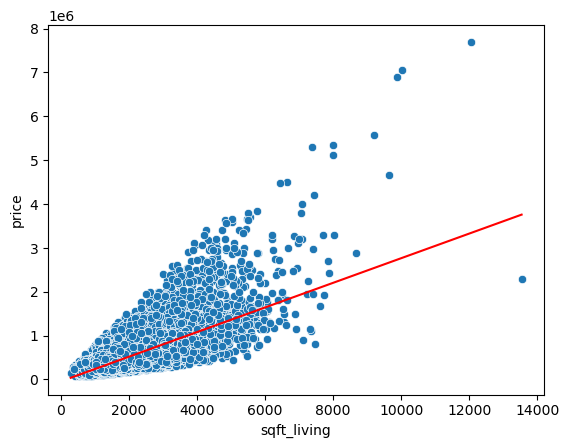

In [33]:
sns.scatterplot(data = data, x = "sqft_living", y = "price")
sns.lineplot(data = data, x = "sqft_living", y = "prediccion_precio", color = "red")
plt.show()

Con esto terminamos el modelo de Regresión Lineal Simple. Como hemos visto, el valor de R^2 no es muy cercano a 1, lo que indica las limitaciones de este modelo para predecir valores influenciados por diferentes variables. En este caso, lo más recomendable sería utilizar un modelo de Regresión Lineal Múltiple.